<a href="https://colab.research.google.com/github/SachinSouravJha/Machine-Learning-Basics/blob/master/GAN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import * #Will import all layers
from keras.layers.advanced_activations import LeakyReLU #Variation of relu which returns damped value of x if x si negative
from keras.models import Sequential,Model #Will use sequential again but if we use functional then we will need Model
from keras.optimizers import Adam
from keras.datasets import mnist #The dataset
import matplotlib.pyplot as plt
import math
import numpy as np

In [0]:
(X_Train,_),(_,_) = mnist.load_data()
#We don't need Y here because we will learn ourselves
#Xtest and Ytest will be generated by us

In [41]:
print(X_Train.shape)
print(type(X_Train))


(60000, 28, 28)
<class 'numpy.ndarray'>


In [42]:
#Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5 #The values will now be between -1 and 1

print(np.min(X_Train)) #The least value
print(np.max(X_Train)) #The maximum value 

-1.0
1.0


In [0]:
NUM_EPOCHS = 50 #Will run 50 times
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE)) #So we will his number of batches
HALF_BATCH_SIZE = int(BATCH_SIZE/2) #Taking half of batch size

NOISE_DIM = 100 #This will be converted to 784 and then will be reshaped to form an image

adam = Adam(lr=2e-4,beta_1=0.5)

In [44]:
#Taking input of 100 then converting to 784 to generate an image
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,))) #Taking the input and converting to 256
generator.add(LeakyReLU(0.2)) #Here it will dampen negative by multiplying by 0.2
generator.add(Dense(512)) #Taking the input and converting to 512
generator.add(LeakyReLU(0.2)) #Here it will dampen negative by multiplying by 0.2
generator.add(Dense(1024)) #Taking the input and converting to 1024
generator.add(LeakyReLU(0.2)) #Here it will dampen negative by multiplying by 0.2
generator.add(Dense(784,activation='tanh')) #Finally will generate image
# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 784)              

In [45]:
#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2)) #Here it will dampen negative by multiplying by 0.2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2)) #Here it will dampen negative by multiplying by 0.2
discriminator.add(Dense(1,activation='sigmoid')) #Finally will generate output
# Final Output (No ReLu or Batch Norm)
discriminator.compile(loss='binary_crossentropy', optimizer=adam)
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
#We don't want to train the discriminator so we put it as false
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,)) #We will generate a random input with size of noise
generated_img = generator(gan_input) #Gan will generate an image accordingly
gan_output = discriminator(generated_img) #

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [47]:
X_Train = X_Train.reshape(-1,784) #Reshaping so it can be used as input
X_Train.shape

(60000, 784)

In [0]:
def show_imgs(epoch,samples=100):#Display images
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM)) #Will take random input
    generated_imgs = generator.predict(noise) #Will generate image from it
    generated_imgs = generated_imgs.reshape(samples,28,28) #Reshape the images
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.show() #And show them too

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.6554 Generator Loss 0.9312
Epoch 2 Disc Loss 0.6340 Generator Loss 1.0036
Epoch 3 Disc Loss 0.6410 Generator Loss 1.0773
Epoch 4 Disc Loss 0.6272 Generator Loss 1.1357
Epoch 5 Disc Loss 0.6105 Generator Loss 1.1692


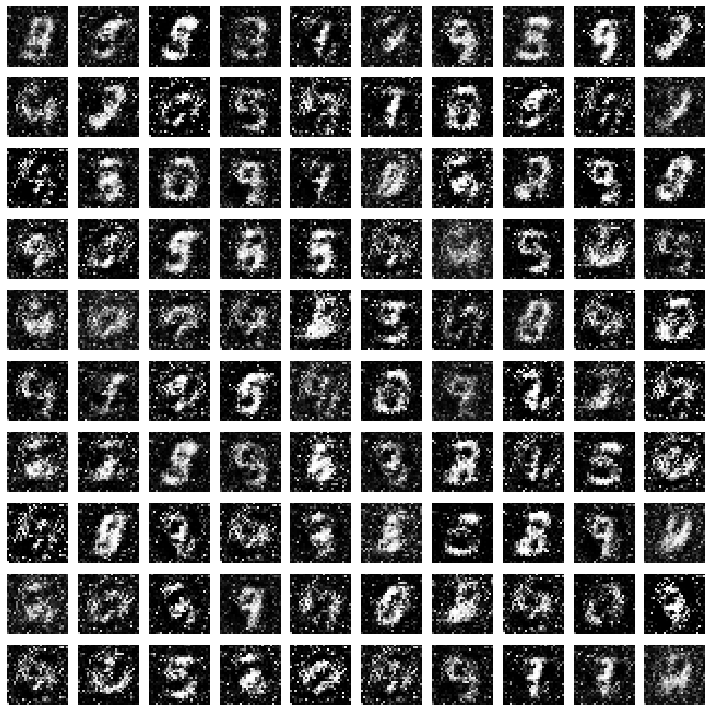

Epoch 6 Disc Loss 0.5819 Generator Loss 1.2840
Epoch 7 Disc Loss 0.5866 Generator Loss 1.2164
Epoch 8 Disc Loss 0.6077 Generator Loss 1.1510
Epoch 9 Disc Loss 0.6097 Generator Loss 1.1419
Epoch 10 Disc Loss 0.6301 Generator Loss 1.0804


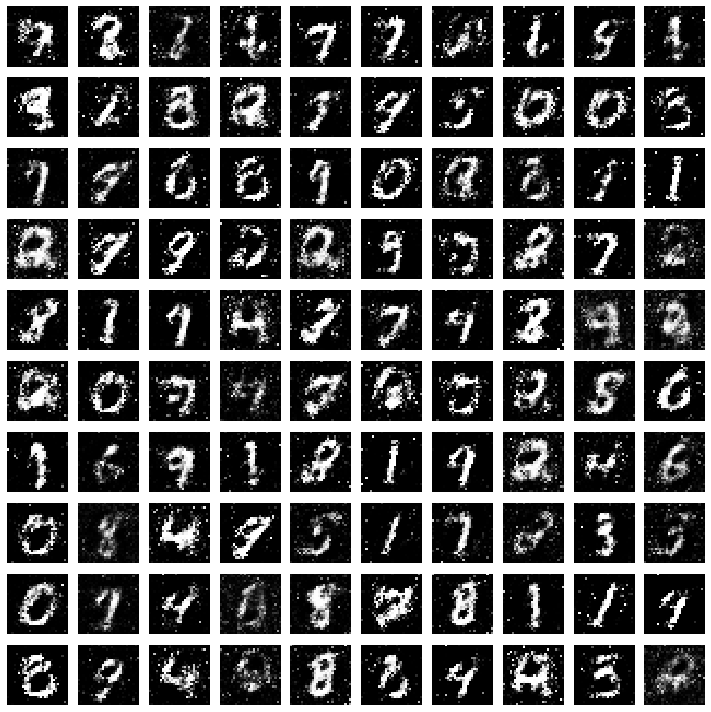

Epoch 11 Disc Loss 0.6322 Generator Loss 1.0711
Epoch 12 Disc Loss 0.6415 Generator Loss 1.0289
Epoch 13 Disc Loss 0.6440 Generator Loss 1.0100
Epoch 14 Disc Loss 0.6482 Generator Loss 1.0086
Epoch 15 Disc Loss 0.6520 Generator Loss 0.9881


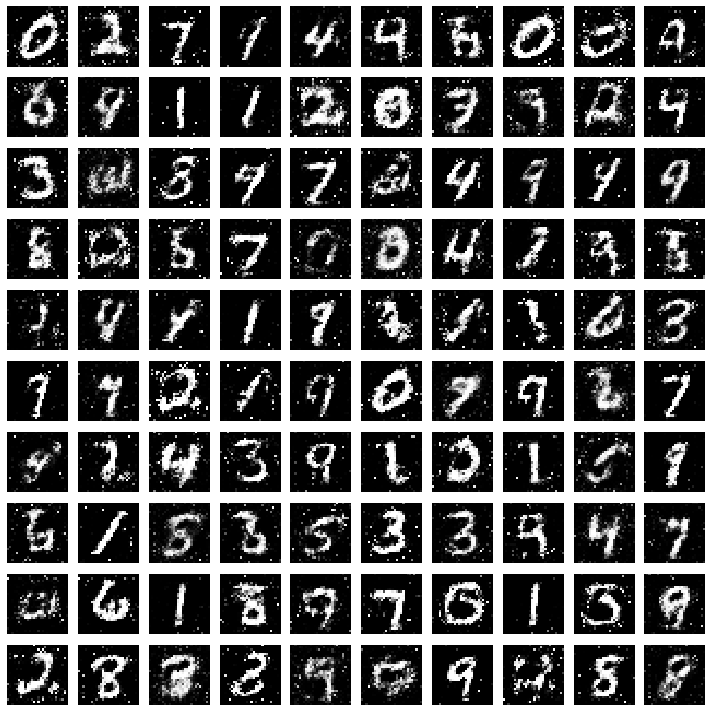

Epoch 16 Disc Loss 0.6541 Generator Loss 0.9899
Epoch 17 Disc Loss 0.6549 Generator Loss 0.9894
Epoch 18 Disc Loss 0.6551 Generator Loss 0.9906
Epoch 19 Disc Loss 0.6555 Generator Loss 0.9946
Epoch 20 Disc Loss 0.6577 Generator Loss 0.9891


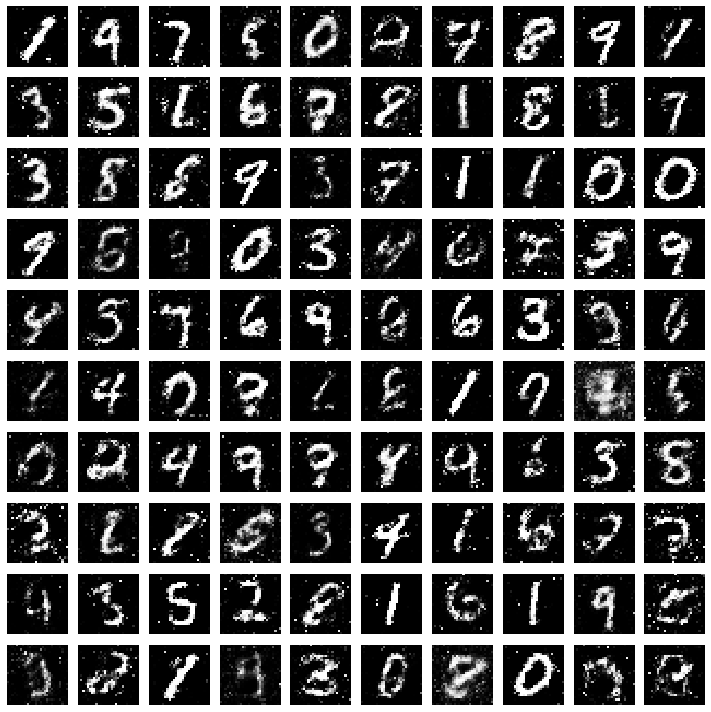

Epoch 21 Disc Loss 0.6593 Generator Loss 0.9847
Epoch 22 Disc Loss 0.6604 Generator Loss 0.9826
Epoch 23 Disc Loss 0.6620 Generator Loss 0.9736
Epoch 24 Disc Loss 0.6628 Generator Loss 0.9786
Epoch 25 Disc Loss 0.6610 Generator Loss 0.9763


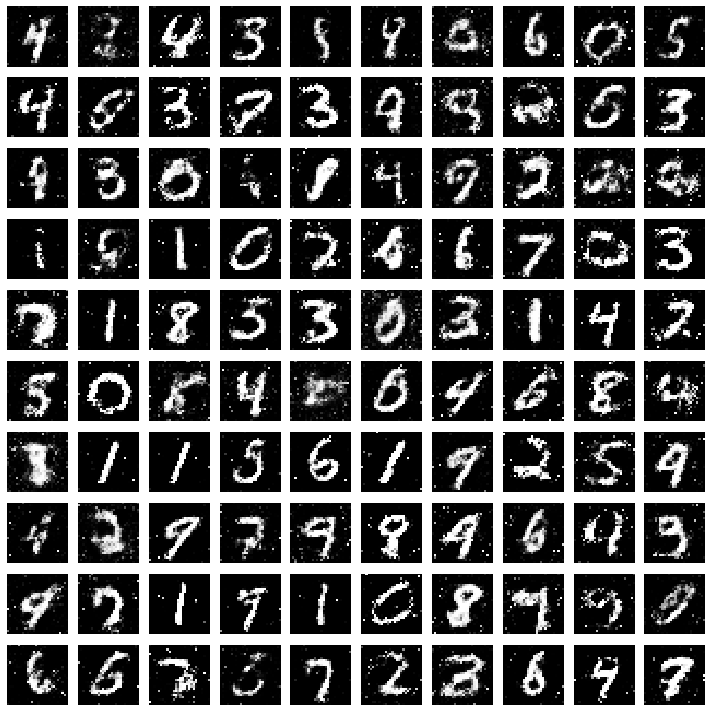

Epoch 26 Disc Loss 0.6601 Generator Loss 0.9779
Epoch 27 Disc Loss 0.6599 Generator Loss 0.9824
Epoch 28 Disc Loss 0.6629 Generator Loss 0.9863
Epoch 29 Disc Loss 0.6634 Generator Loss 0.9728
Epoch 30 Disc Loss 0.6644 Generator Loss 0.9742


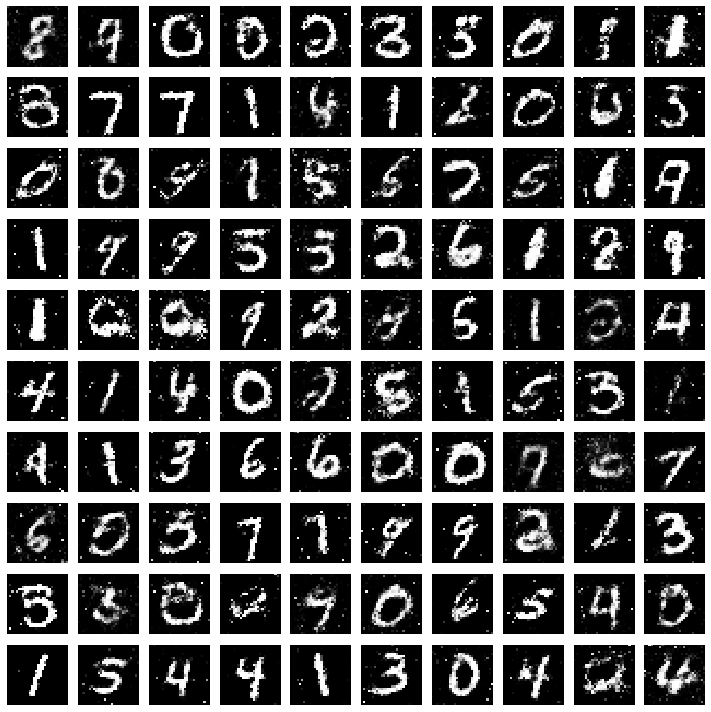

Epoch 31 Disc Loss 0.6658 Generator Loss 0.9717
Epoch 32 Disc Loss 0.6643 Generator Loss 0.9732
Epoch 33 Disc Loss 0.6643 Generator Loss 0.9803
Epoch 34 Disc Loss 0.6652 Generator Loss 0.9723
Epoch 35 Disc Loss 0.6652 Generator Loss 0.9753


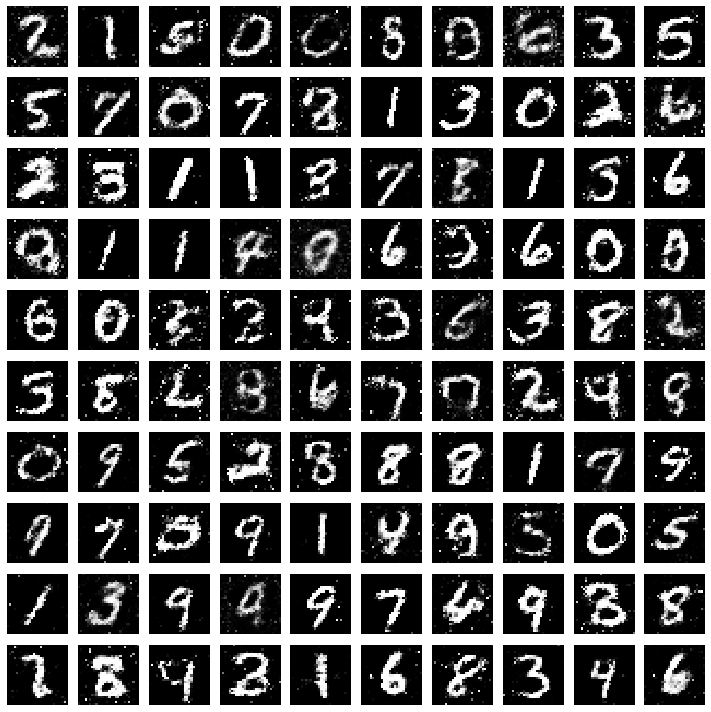

Epoch 36 Disc Loss 0.6655 Generator Loss 0.9707
Epoch 37 Disc Loss 0.6654 Generator Loss 0.9736
Epoch 38 Disc Loss 0.6667 Generator Loss 0.9681
Epoch 39 Disc Loss 0.6661 Generator Loss 0.9684
Epoch 40 Disc Loss 0.6678 Generator Loss 0.9686


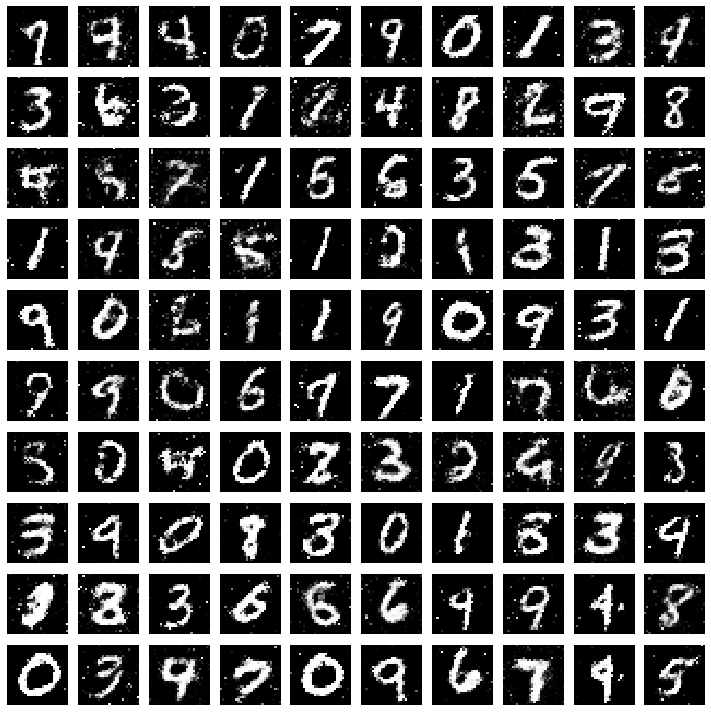

Epoch 41 Disc Loss 0.6671 Generator Loss 0.9722
Epoch 42 Disc Loss 0.6674 Generator Loss 0.9657
Epoch 43 Disc Loss 0.6676 Generator Loss 0.9665
Epoch 44 Disc Loss 0.6659 Generator Loss 0.9706
Epoch 45 Disc Loss 0.6665 Generator Loss 0.9718


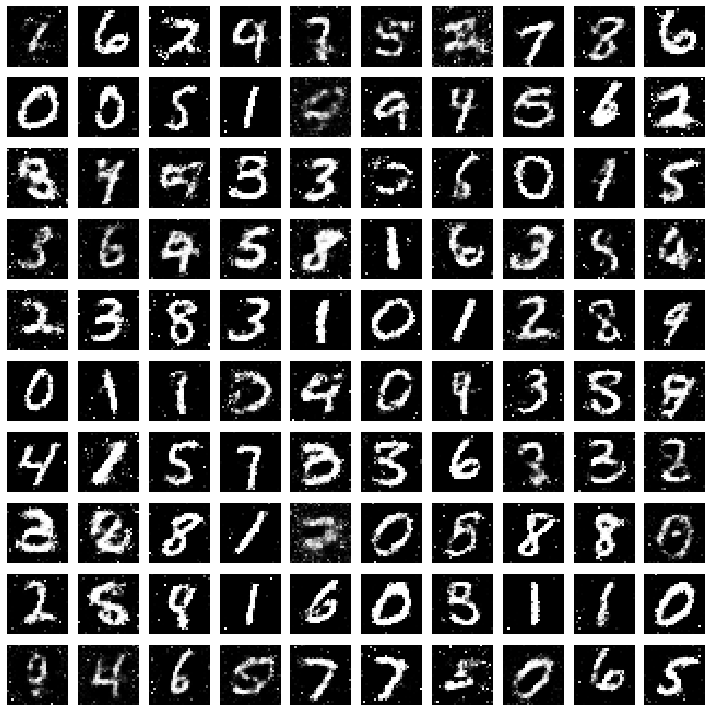

Epoch 46 Disc Loss 0.6685 Generator Loss 0.9648
Epoch 47 Disc Loss 0.6673 Generator Loss 0.9647
Epoch 48 Disc Loss 0.6671 Generator Loss 0.9639
Epoch 49 Disc Loss 0.6683 Generator Loss 0.9659
Epoch 50 Disc Loss 0.6671 Generator Loss 0.9678


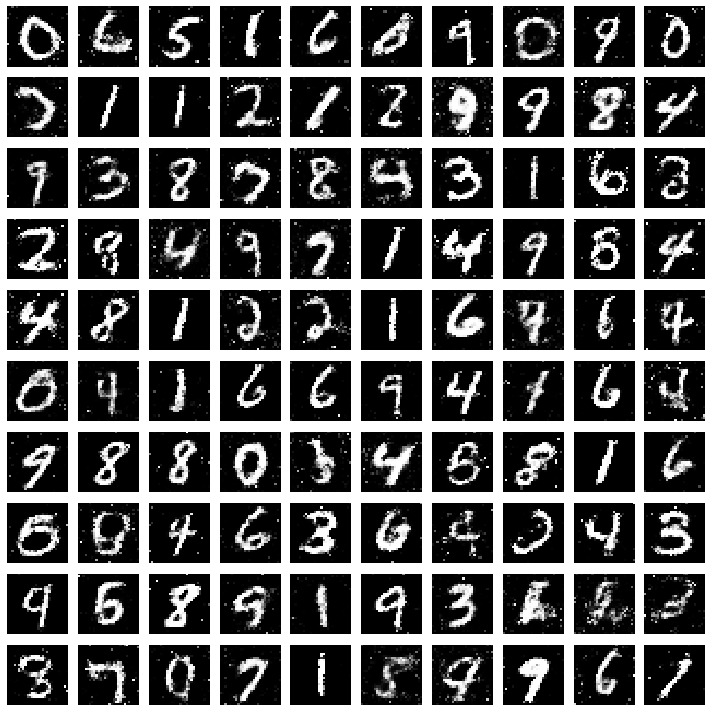

In [50]:
# Training Loop
d_losses = []
g_losses = []

for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE) #From a range of 0 to 60,000 it will pick 128 real images
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM)) #Will generate a random image
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1)) #Fake images have zero
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #So discriminator will try to give high values for real, but if it fails loss will be high
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)  #It will try to give low value for fake generated images, so generator will raise its game
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake #Total loss
        
        epoch_d_loss += d_loss

#Train Generator (Complete Model Generator + Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        #We can see that both the losses are stable because generator is getting better at producing images while discriminator is getting better at making fake
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES) #Storing all losses of discriminator
    g_losses.append(epoch_g_loss/NO_OF_BATCHES) #Storing all losses of generator
    
    if (epoch+1)%5==0:
      show_imgs(epoch)

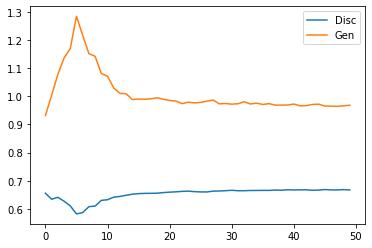

In [51]:
plt.plot(d_losses,label="Disc") #Plotting Dicriminator losses
plt.plot(g_losses,label="Gen") #Plotting Generator losses
plt.legend()
plt.show()